In [1]:
%load_ext autoreload

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from titanic.data.make_dataset import load_titanic

titanic = load_titanic()
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö Age

In [ ]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age
from titanic.features.fill import fill_age, age_imputer

In [20]:
# –ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è
print("–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(titanic)}")
print(f"–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age: {titanic['Age'].isna().sum()}")
print(f"–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ Age: {titanic['Age'].isna().sum() / len(titanic) * 100:.1f}%")

if titanic['Age'].notna().any():
    print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age:")
    print(titanic['Age'].describe())

–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: 891
–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age: 177
–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ Age: 19.9%

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [21]:
# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è Age —Å–ª—É—á–∞–π–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏ –æ—Ç 1 –¥–æ 80
filled_ages = fill_age(titanic, min_age=1, max_age=80, random_state=42)

# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –∏—Å—Ö–æ–¥–Ω–æ–≥–æ DataFrame –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
titanic_filled = titanic.copy()
titanic_filled['Age'] = filled_ages

print("–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è:")
print(f"–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age: {titanic_filled['Age'].isna().sum()}")
print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ Age –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è:")
print(titanic_filled['Age'].describe())

# –ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¢–û–õ–¨–ö–û –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
originally_missing = titanic['Age'].isna()
filled_values = titanic_filled[originally_missing]['Age']
print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¢–û–õ–¨–ö–û –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö: {len(filled_values)}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω: {filled_values.min()} - {filled_values.max()}")
print(f"–°—Ä–µ–¥–Ω–µ–µ: {filled_values.mean():.2f}")

–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è:
–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age: 0

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ Age –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è:
count    891.000000
mean      31.689113
std       17.272010
min        0.000000
25%       20.000000
50%       29.000000
75%       42.000000
max       80.000000
Name: Age, dtype: float64

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¢–û–õ–¨–ö–û –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö: 177
–î–∏–∞–ø–∞–∑–æ–Ω: 1 - 80
–°—Ä–µ–¥–Ω–µ–µ: 39.80


### –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —Ñ–∞–π–ª

–¢–µ–ø–µ—Ä—å —Å–æ—Ö—Ä–∞–Ω–∏–º –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ Age –æ–±—Ä–∞—Ç–Ω–æ –≤ CSV —Ñ–∞–π–ª.

In [ ]:
import os

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º
original_file = "../data/raw/train.csv"
backup_file = "../data/raw/train_backup.csv"
filled_file = "../data/raw/train_filled.csv"

# –°–æ–∑–¥–∞–µ–º —Ä–µ–∑–µ—Ä–≤–Ω—É—é –∫–æ–ø–∏—é –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ñ–∞–π–ª–∞ (–µ—Å–ª–∏ –µ—â–µ –Ω–µ —Å–æ–∑–¥–∞–Ω–∞)
if not os.path.exists(backup_file):
    print("–°–æ–∑–¥–∞–µ–º —Ä–µ–∑–µ—Ä–≤–Ω—É—é –∫–æ–ø–∏—é –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ñ–∞–π–ª–∞...")
    import shutil
    shutil.copy2(original_file, backup_file)
    print(f"‚úÖ –†–µ–∑–µ—Ä–≤–Ω–∞—è –∫–æ–ø–∏—è —Å–æ–∑–¥–∞–Ω–∞: {backup_file}")
else:
    print(f"‚ÑπÔ∏è  –†–µ–∑–µ—Ä–≤–Ω–∞—è –∫–æ–ø–∏—è —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç: {backup_file}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ –Ω–æ–≤—ã–π —Ñ–∞–π–ª
print(f"\n–°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ —Å –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ Age –≤: {filled_file}")
titanic_filled.to_csv(filled_file, index=False)
print("‚úÖ –î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!")

# –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ: –∑–∞–º–µ–Ω–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
replace_original = False  # –ò–∑–º–µ–Ω–∏—Ç–µ –Ω–∞ True, –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –∑–∞–º–µ–Ω–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª

if replace_original:
    print(f"\n‚ö†Ô∏è  –ó–∞–º–µ–Ω—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏...")
    titanic_filled.to_csv(original_file, index=False)
    print("‚úÖ –ò—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª –æ–±–Ω–æ–≤–ª–µ–Ω!")
else:
    print(f"\n‚ÑπÔ∏è  –ò—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª –ù–ï –∏–∑–º–µ–Ω–µ–Ω. –ó–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤: {filled_file}")
    print("üí° –ß—Ç–æ–±—ã –∑–∞–º–µ–Ω–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª, —É—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ replace_original = True")

In [ ]:
import os

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
if os.path.exists(filled_file):
    # –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã–π —Ñ–∞–π–ª –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
    saved_data = pd.read_csv(filled_file)
    
    print("üîç –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω–æ–≥–æ —Ñ–∞–π–ª–∞:")
    print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {saved_data.shape}")
    print(f"–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π Age: {saved_data['Age'].isna().sum()}")
    
    # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
    original_data = pd.read_csv(backup_file if os.path.exists(backup_file) else original_file)
    print(f"\n–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –∏—Å—Ö–æ–¥–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏:")
    print(f"–ò—Å—Ö–æ–¥–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ Age: {original_data['Age'].isna().sum()}")
    print(f"–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è: {saved_data['Age'].isna().sum()}")
    print(f"–ó–∞–ø–æ–ª–Ω–µ–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–π: {original_data['Age'].isna().sum() - saved_data['Age'].isna().sum()}")
    
    print("\n‚úÖ –§–∞–π–ª —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω –∏ –ø—Ä–æ–≤–µ—Ä–µ–Ω!")
else:
    print(f"‚ùå –§–∞–π–ª {filled_file} –Ω–µ –Ω–∞–π–¥–µ–Ω. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –ø—Ä–µ–¥—ã–¥—É—â–∞—è —è—á–µ–π–∫–∞ –±—ã–ª–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞.")

NameError: name 'os' is not defined

## –ü–æ–∏—Å–∫ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö

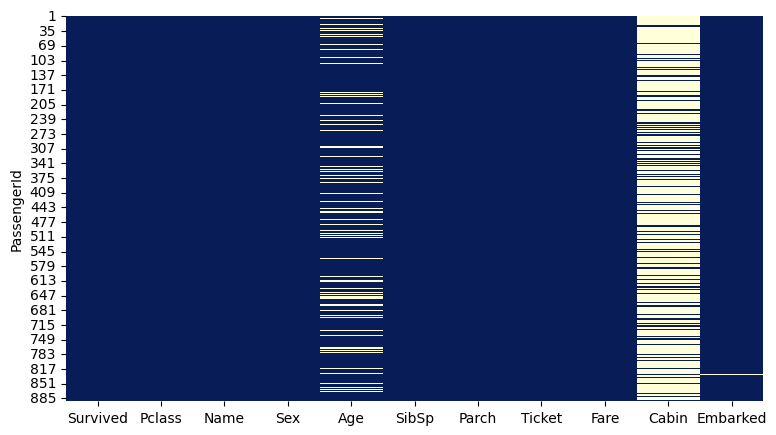

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞

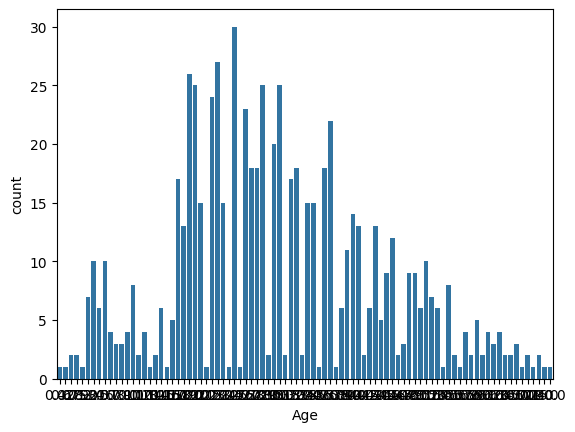

In [15]:
sns.countplot(x='Age', data=titanic);

## –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

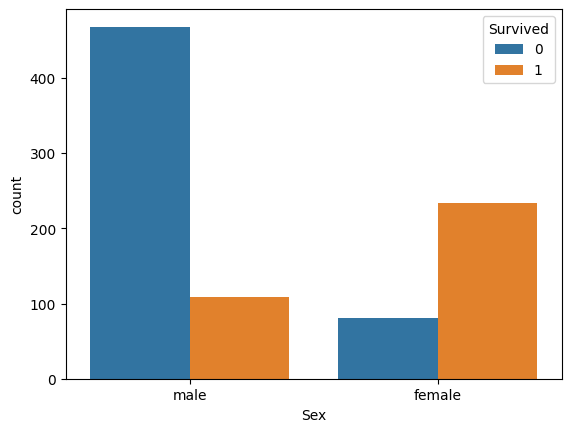

In [10]:
sns.countplot(x='Sex', hue='Survived', data=titanic);

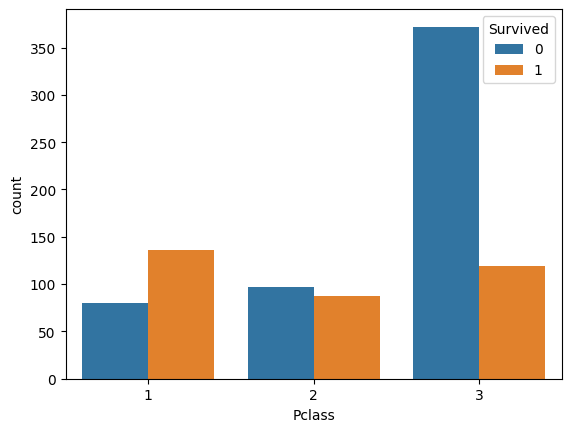

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=titanic);

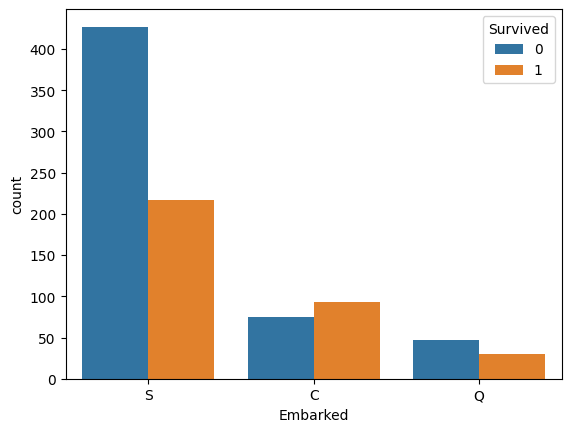

In [14]:
sns.countplot(x='Embarked', hue='Survived', data=titanic);

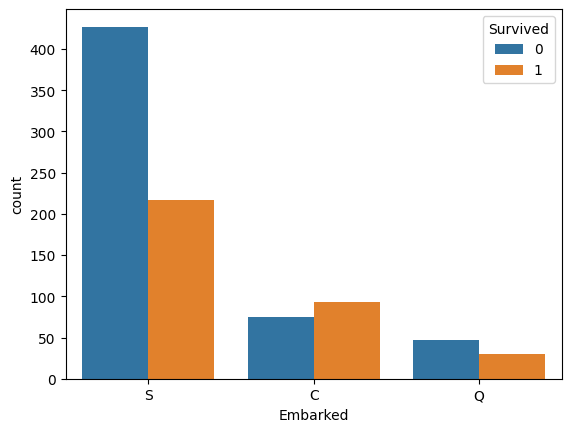

In [15]:
sns.countplot(x='Embarked', hue='Survived', data=titanic);

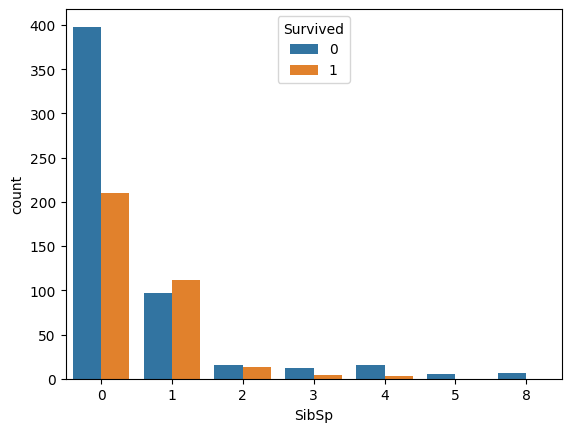

In [16]:
sns.countplot(x='SibSp', hue='Survived', data=titanic);

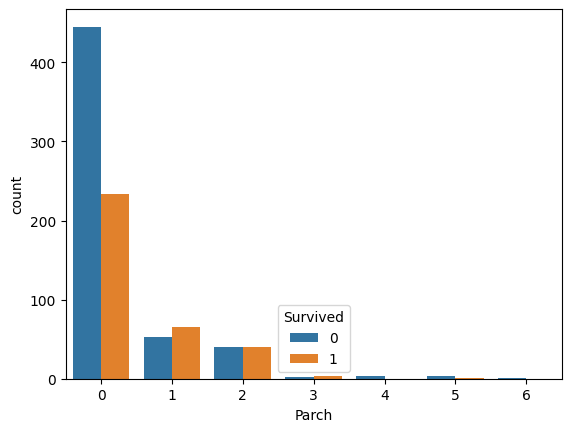

In [17]:
sns.countplot(x='Parch', hue='Survived', data=titanic);

## –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–º–µ–Ω–Ω–æ–π —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

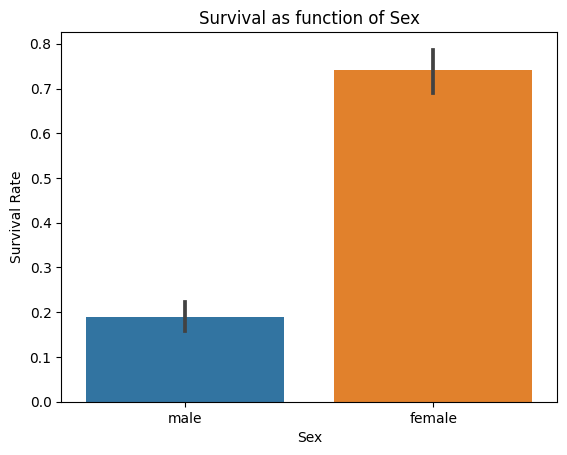

In [10]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex")
plt.show()

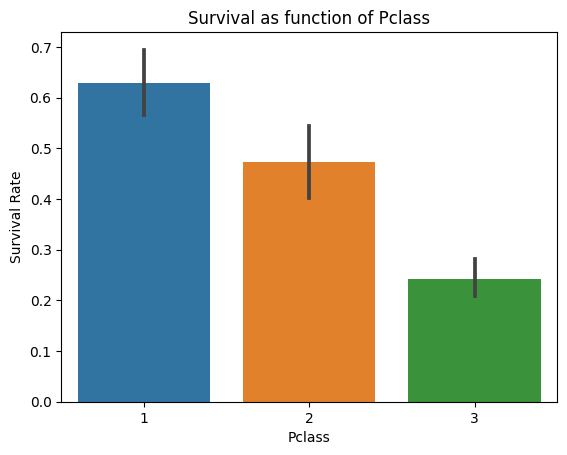

In [11]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

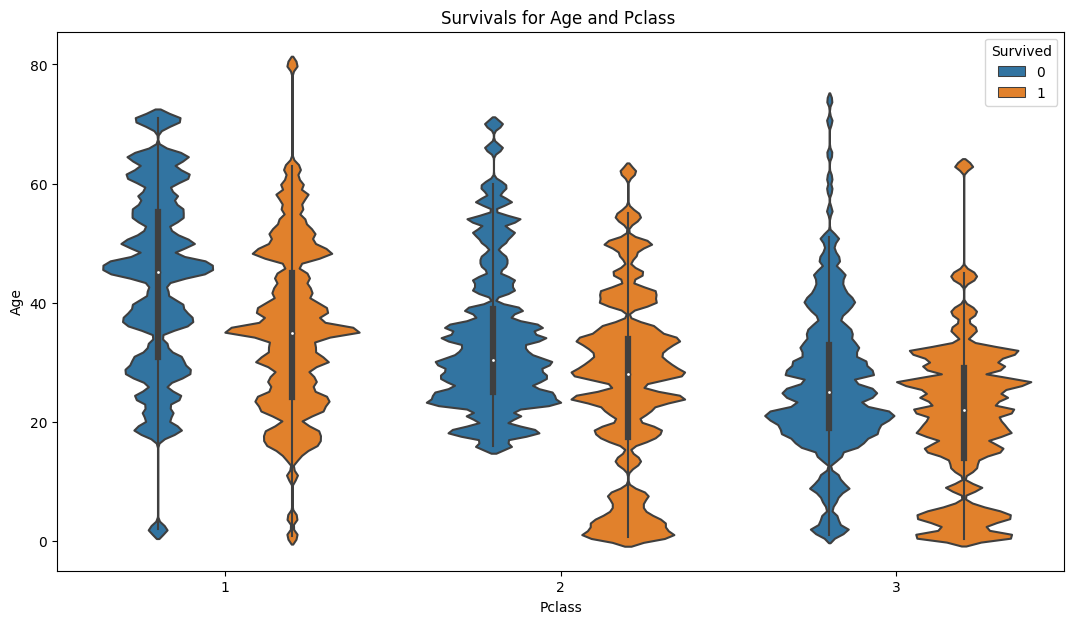

In [12]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x='Pclass', y='Age', hue='Survived', dodge=True, bw=0.05, data=titanic, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

## –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [13]:
from titanic.features.extract import *

titanic['family_size'] = family_size(titanic)
titanic['is_alone'] = is_alone(titanic)

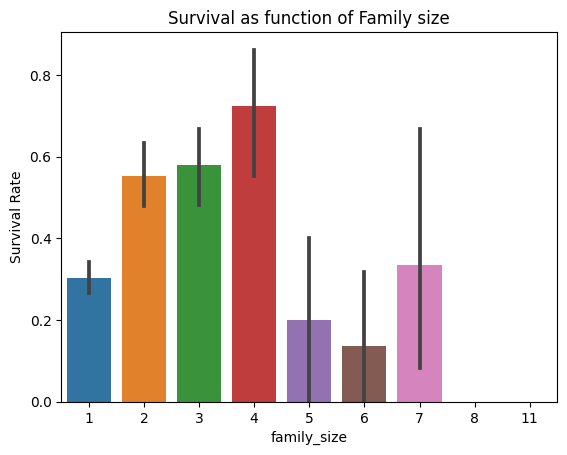

In [14]:
sns.barplot(x='family_size', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Family size")
plt.show()

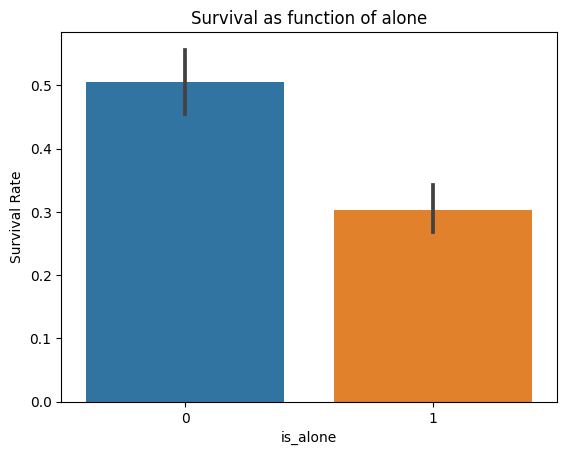

In [15]:
sns.barplot(x='is_alone', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of alone")
plt.show()

## –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [16]:
from titanic.features.fill import fill_embarked

titanic['Embarked'] = fill_embarked(titanic)